<a href="https://colab.research.google.com/github/Shanthan0/Python/blob/main/Multiple_linear_regression_Introduction_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 
 

---

### Problem Statement

CO2 emissions are majorly responsible for global climate change. Excess CO2 emissions causes severe air pollution and many people suffer from respiratory disorders. Automobiles are a major source of CO2 emissions. Thus, it is important to measure the CO2 emission to maintain a healthy environment for all living beings on earth.

Implement multiple linear regression to create a predictive model capable of estimating CO2 emission of cars based on different data of the car models. Also, evaluate the accuracy of the prediction model.






---

### List of Activities

**Activity 1:** Analysing the Dataset

 
**Activity 2:** Train-Test Split

**Activity 3:**  Model Training

**Activity 4:** Model Prediction 

**Activity 5:** Model Evaluation







---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **FuelConsumptionCO2** dataset using the below link. This dataset consists of data of 2014 cars such as engine size, number of cylinders, fuel consumption and CO2 emission.



  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/FuelConsumptionCo2.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.





In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 
# Load the dataset

df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/FuelConsumptionCo2.csv')
# Print first five rows using head() function
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
# Get the list of columns of the dataset.
df.columns.values

array(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE',
       'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
       'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype=object)

---

#### Activity 2: Train-Test Split

We need to predict the value of `CO2EMISSIONS` variable, given other variables. Thus, `CO2EMISSIONS` is the target variable and other columns except `CO2EMISSIONS` are the feature variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

**Note:** Do not consider the columns such as `MODELYEAR`, `MAKE`, `MODEL`, `VEHICLECLASS` as feature variables since they are not much significant in this analysis.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
features = list(df.columns.values)
features.remove('CO2EMISSIONS')
features.remove('MODELYEAR')
features.remove('MAKE')
features.remove('VEHICLECLASS')
features.remove('MODEL')
x = df[features]
y = df['CO2EMISSIONS']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)


---

#### Activity 3: Model Training

Implement multiple linear regression using `sklearn` module by creating an object of the `LinearRegression` class and calling the `fit()` function.

**Note:** Reshaping the target variable array into a 2D array is not mandatory in multiple linear regression. You can skip that.

In [ ]:
# Build linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# Print the value of the intercept 
print(f'Interecept : {lr.intercept_}')
# Print the names of the features along with the values of their corresponding coefficients.
for i in range(len(features)):
  print(f'{features[i]} : {lr.coef_[i]}')


Interecept : 256.9961125539137
ENGINESIZE : 9.384088539141073
CYLINDERS : 6.724060541314939
FUELCONSUMPTION_CITY : -14.730791287420606
FUELCONSUMPTION_HWY : -6.960194944246538
FUELCONSUMPTION_COMB : 25.410124567872778
FUELCONSUMPTION_COMB_MPG : -3.9097373858503754


---

#### Activity 4: Model Prediction using Test Set

Predict the values for the test set by calling the `predict()` function on the LinearRegression object. 



In [ ]:
# Predict the target variable values for test set
y_test_predict = lr.predict(x_test)

---

#### Activity 5: Model Evaluation

Calculate the $R^2$, MSE, RMSE and MAE values for the test set to evaluate the accuracy of your model. Also, perform residual analysis to check if the error terms are normally distributed for the test set.

In [ ]:
# Evaluate the model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module for the test set.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f'R square: {r2_score(y_test,y_test_predict):3f}')
print(f'MSE: {mean_squared_error(y_test,y_test_predict):3f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_predict):3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_predict)):3f}')

R square: 0.903258
MSE: 390.209880
MAE: 12.841050
RMSE: 19.753731


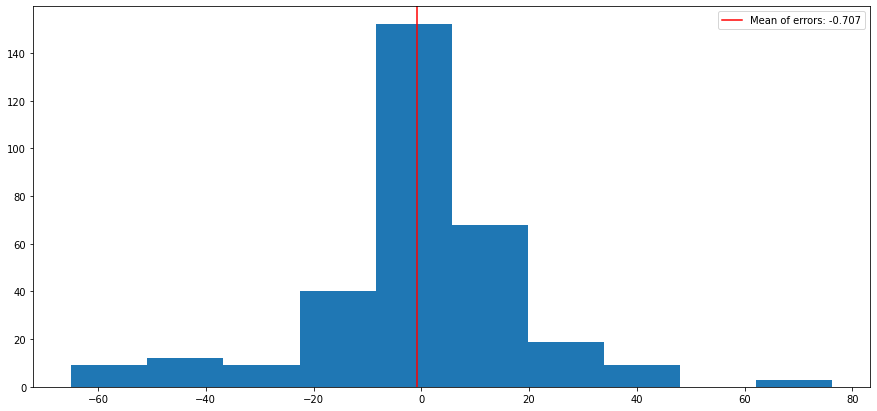

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set
plt.figure(figsize = (15,7))
errors = y_test - y_test_predict
plt.hist(errors,bins = 'sturges')
plt.axvline(np.mean(errors),color = 'red',label = f'Mean of errors: {np.mean(errors):.3f}')
plt.legend()
plt.show()

**Q:** What is the mean of errors for the test test? Is it zero?

**A:** No mean of errors is not zero. Mean value is -0.707


---